In [29]:
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

plt.style.use('dark_background')

In [30]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/Pi Formula')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import sys
# Append parent dir to path, so that other modules can be imported.
sys.path.append('../')

$$\pi = \sum_{n=0}^{\infty}\frac{1}{n!}
\left(\frac{1}{n+\lambda} - \frac{4}{2n+1} \right)
\left(\frac{(2n+1)^2}{4(n+\lambda)} - n \right)_{n-1}$$

The first term of the series evaluates to 4 and is free of $\lambda$.

$$\pi = 4 + \sum_{n=1}^{\infty}\frac{1}{n!}
\left(\frac{1}{n+\lambda} - \frac{4}{2n+1} \right)
\left(\frac{(2n+1)^2}{4(n+\lambda)} - n \right)_{n-1}$$

\
The Pochhammer symbol (rising factorial) is defined as
$$(z)_m = \frac{\Gamma(z+m)}{\Gamma(z)}$$

let $z = \frac{(2n+1)^2}{4(n+\lambda)}$ and combining with the divide by $n!$ we get
$$\frac{(z-n)_{n-1}}{n!} = \frac{\Gamma(z-n+(n-1))}{(n!)\Gamma(z-n)} =
\left(\frac{1}{n!}\right)\frac{\Gamma(z-1)}{\Gamma(z-n)}$$

for integer $n\ge1$,
$$\left(\frac{1}{n!}\right) \frac{\Gamma(z-1)}{\Gamma(z-n)} =
\frac{(z-2)(z-3)\cdots(z-n)(\Gamma(z-n))}{(n!)\Gamma(z-n)} =
\left(\frac{z-2}{2}\right)\left(\frac{z-3}{3}\right)\cdots\left(\frac{z-n}{n}\right)$$
$$=\prod_{m=2}^n \left(\frac{z-m}{m}\right)
=\prod_{m=2}^n \left(\frac{z}{m}-1\right)$$

for integer $n\ge0$,
$$\left(\frac{1}{n!}\right) \frac{\Gamma(z-1)}{\Gamma(z-n)}
=\frac{\prod_{m=1}^n \left( \frac{z}{m}-1 \right) }{z-1}$$
this will give the expected result for $n=0$ where the numerator will be an empty product and evaluate to 1 so we will be left with $z-1$ in the denominator giving the expected result $\frac{1}{z-1}.$

\
$$\pi = \sum_{n=0}^{\infty} \left(
\left(\frac{1}{n+\lambda} - \frac{4}{2n+1} \right)
\frac{\prod_{m=1}^n \left(\frac{(2n+1)^2}{4m(n+\lambda)} - 1 \right)}{\frac{(2n+1)^2}{4(n+\lambda)} - 1} \right)$$

$$ = \sum_{n=0}^{\infty} \left( \left(
\frac{
    \frac{2n+1 - 4(n+\lambda)}{(n+\lambda)(2n+1)}}
    {\frac{(2n+1)^2 - 4(n+\lambda)}{4(n+\lambda)}
} \right)
\prod_{m=1}^n \left(\frac{(2n+1)^2}{4m(n+\lambda)} - 1 \right) \right) $$

$$ =  \sum_{n=0}^{\infty} \left( \left(
\frac{4(2n+1 - 4(n+\lambda))}{(2n+1)((2n+1)^2 - 4(n+\lambda))} \right)
\prod_{m=1}^n \left(\frac{(2n+1)^2}{4m(n+\lambda)} - 1 \right)
\right) $$

\
Or you can just start the sum from 1 and avoid 0 since the summand for $n=0$ evaluates to 4.

$$\pi = 4 + \sum_{n=1}^{\infty} \left(
\left(\frac{1}{n+\lambda} - \frac{4}{2n+1} \right)
\prod_{m=2}^n \left(\frac{(2n+1)^2}{4m(n+\lambda)} - 1 \right) \right)$$

In [32]:
from pi_formula_core import pi_appr, expand_pi_series, compute_roots

## Finding roots of the function

In [33]:
# Symbolic simplification.
expand_pi_series(num_terms=3)

(416*lambda**3 + 1780*lambda**2 + 2923*lambda + 1679)/(120*lambda**3 + 600*lambda**2 + 960*lambda + 480)

In [34]:
# Numerical root computation.
compute_roots(num_terms=3)

array([-1.37253375+0.j,  1.06578213+0.j,  2.99730792+0.j])

In [35]:
from pi_formula_core import refine_roots, save_roots, load_roots

In [36]:
path_to_roots = 'pi_formula_roots.json'

# num_terms = 21
# all_roots = [compute_roots(n) for n in tqdm(range(1, 1+num_terms))]
# save_roots(all_roots, path_to_roots)

all_roots = load_roots(path_to_roots)

In [37]:
from modules.visualize import scatter_roots, make_yticks_imaginary

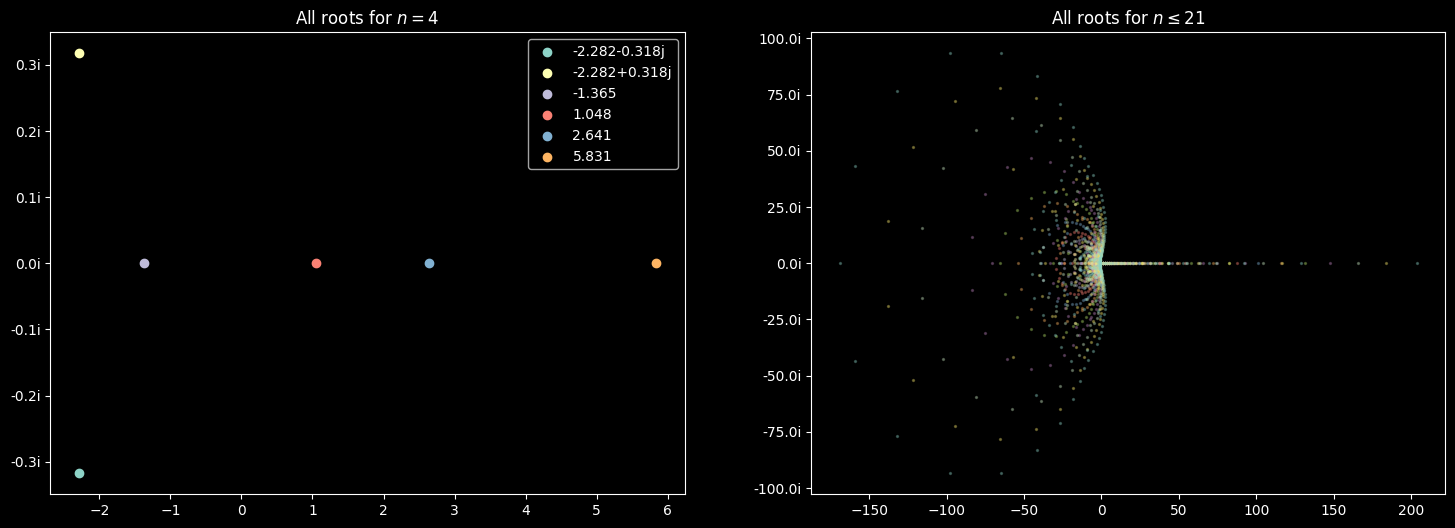

In [38]:
n = 4
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

scatter_roots(axs[0], all_roots[n-1], label=True)
make_yticks_imaginary(axs[0])
axs[0].set_title(fr'All roots for $n={n}$')
axs[0].legend()

scatter_roots(axs[1], all_roots,
              scatter_kwargs = {'s': 2, 'alpha': 0.3})
make_yticks_imaginary(axs[1])
axs[1].set_title(fr'All roots for $n\leq {len(all_roots)}$')

plt.show()

wolfram alpha
- [experession inside the sum](https://www.wolframalpha.com/input?i=%281%2Fn%21%29%281%2F%28n%2Bz%29-4%2F%282n%2B1%29%29*Pochhammer%5B%28%28%282n%2B1%29%5E2%29%2F%284%28n%2Bz%29%29-n%29%2C+n-1%5D): \
`(1/n!)(1/(n+z)-4/(2n+1))*Pochhammer[(((2n+1)^2)/(4(n+z))-n), n-1]` \

- complete expression: \
`Sum[(1/n!)(1/(n+z)-4/(2n+1))*Pochhammer[(((2n+1)^2)/(4(n+z))-n), n-1],{n,0,∞}]`

\
To get values of $\lambda$ for a specific number of terms: \
`solve Sum[(1/n!)(1/(n+z)-4/(2n+1))*Pochhammer[(((2n+1)^2)/(4(n+z))-n), n-1],{n,0,2}] = π` \
Replace the 2 in `{n,0,2}` with the number of terms you want. \
For n greater than 2 you will also get some complex solutions.



The first term ($n=0$) evaluates to a constant ($4$) and since there is no variable ($\lambda$) so there are no roots.

Using 2 terms, you get a unique solution to lambda: \
$\lambda = \frac{11-3\pi}{3\pi-8} \approx 1.10559124481403$

\
Using 3 terms, you get 3 solutions:
- $\lambda \approx -1.372533751863114$
- $\lambda \approx 1.065782132255191$
- $\lambda \approx 2.99730792196237$

\
Using 4 terms, you get 6 solutions:
- $\lambda \approx -1.36544500448242$
- $\lambda \approx 1.04751907232838$
- $\lambda \approx 2.64089266467481$
- $\lambda \approx 5.83127071695813$
- $\lambda \approx -2.28220670377529 \pm 0.31755927962830 i$

\
Using `n` terms you get $\frac{n(n-1)}{2}$ solutions. \
Using all terms upto `n` gives you $\sum_{i=1}^n \frac{i(i-1)}{2} = \frac{(n-1)n(n+1)}{6}$



|                 | n = 1 | n = 2                 | n = 4                   | n = 5                           | n = 6                                        |
|-----------------|-|-----------------------|-------------------------|---------------------------------|----------------------------------------------|
|                 | |                       |                         |                                 | -3.3341637262910089629                       |
|                 | |                       | -1.372533751863114      | -1.36544500448242               | -1.3758584171125884035                       |
|                 | | 1.10559124481403      | 1.065782132255191       | 1.04751907232838                | 1.0371194715328406118                        |
|                 | |                       | 2.99730792196237        | 2.64089266467481                | 2.4704191573026508917                        |
|                 | |                       |                         | 5.83127071695813                | 4.8474420307439868343                        |
|                 | |                       |                         |                          	      | 9.6202548698197930984                        |
|                 | |                       |                         |                                 | -3.1759980768850222335 ± 0.5460040860711501242 i |
|                 | |                       |                         | -2.28220670377529 ± 0.31755927962830 i | -2.2602575725709988047 ± 0.3149145744706947181 i |



- Values to the right of the complex plane $\Re(\lambda) > -1$ :
  - All values of $\lambda$ in this half, even purely imaginary, seem to converge to $\pi$ as $n$ grows larger.
  - All $\lambda$ which hit $\pi$ exactly for a specific $n$ seems to be purely real $\Im(\lambda)=0$.
- Values to the left of the complex plane $\Re(\lambda) \le -1$ :
  - The function has a pole at $\lambda=-1$
  - All other values of $\lambda$ in this half seem to diverge as $n$ grows larger.
  - Yet there are values of $\lambda$ which hit $\pi$ exactly for a specific $n$ but dont converge to it.
    - These can be purely real or complex conjugate pairs.

## Plot function convergence

In [39]:
from modules.visualize import plot_convergence_1d_pi, animate_convergence_1d_pi
from modules.visualize import plot_convergence_2d_pi, animate_convergence_2d_pi

from modules.complex_grid_processor import compute_convergence_2d_pi

In [40]:
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="divide by zero encountered in divide")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="overflow encountered in divide")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in multiply")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in add")

### In one dimension

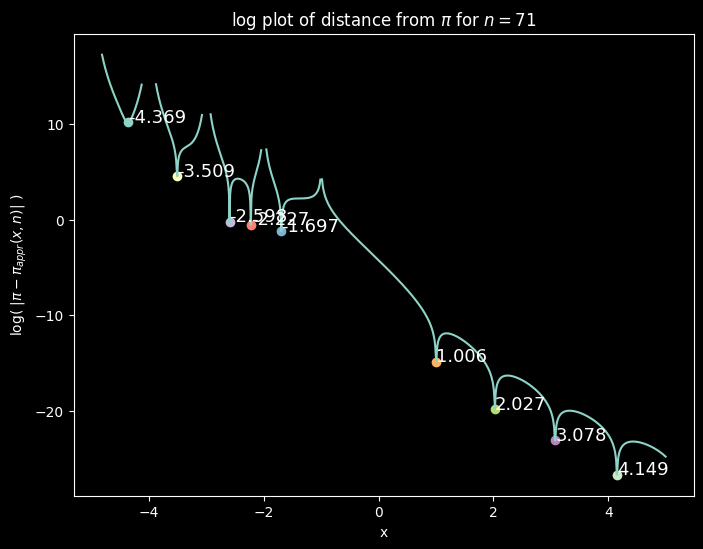

In [41]:
num_terms = 71
w = 5
x = np.linspace(-w, w, 1000)
appr_err = abs(np.pi - pi_appr(x[:, None], num_terms, axis=1))
y = np.log(appr_err)

fig, ax = plt.subplots(figsize=(8, 6))
# fig, ax = plt.subplots(figsize=(18, 12))
plot_convergence_1d_pi(ax, x, y, find_peaks_kwargs={'prominence': 2})
ax.set_title(rf'log plot of distance from $\pi$ for $n={num_terms}$')
plt.show()

Uncomment the cell below to compute and save the animation.

In [42]:
# num_terms = 71
# w = 5
# x = np.linspace(-w, w, 1000)
# anim = animate_convergence_1d_pi(x, num_terms)
# anim.save('anims/pi_zeros_1d.mp4', fps=1)

### In two dimensions

In [43]:
num_terms = 7
w = 5
extent = [-w, w, -w, w]  # x_start, x_end, y_start, y_end
res = 512
# spc.gamma(172) -> inf, hence summands greater than or equal to that would just evaluate to 0.
# rf also quickly explodes soon after depending on the value of z, causing the loop to terminate.
img_generator = compute_convergence_2d_pi(extent, num_terms=num_terms, res=res)
*_, pi_appr_img = tqdm(img_generator, total=num_terms)
pi_appr_err = np.log(abs(np.pi - pi_appr_img))

  0%|          | 0/7 [00:00<?, ?it/s]

Uncomment the cell below to compute and save the animation.

In [44]:
# num_terms = 101
# w = 5
# extent = [-w, w, -w, w]  # x_start, x_end, y_start, y_end
# res = 2048
# anim = animate_convergence_2d_pi(extent, num_terms=num_terms, res=res,
#                                 # cyclic_color_overlay=True,
#                                 # all_roots=all_roots,
#                                 # vmin=pi_appr_err.min(), vmax=pi_appr_err.max())
#                                 )
# anim.save('anims/pi_zeros_2d.mp4', fps=1)

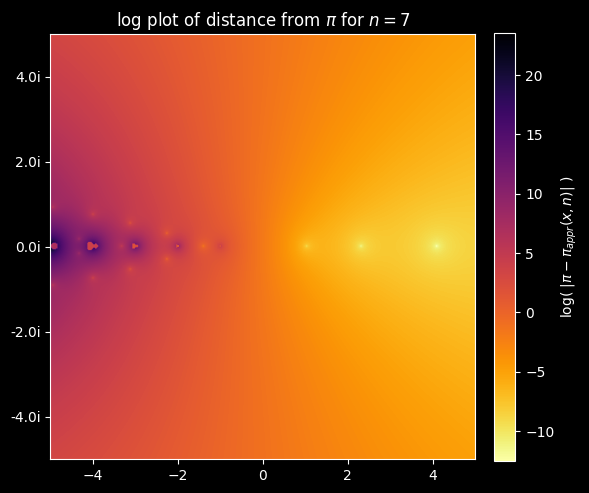

In [45]:
fig, ax = plt.subplots(figsize=(6, 6))
roots = [] # if num_terms>=len(all_roots) else all_roots[num_terms-1]
plot_convergence_2d_pi(ax, extent, pi_appr_err, fig=fig,
                    roots=roots, scatter_kwargs = {'s':2, 'alpha':0.7},
                    # cyclic_color_overlay=True,
                    )
ax.set_title(rf'log plot of distance from $\pi$ for $n={num_terms}$')
plt.show()

In [46]:
n = 4
roots = all_roots[n-1]
print(f'All roots converging with {n} terms:\n', roots, end='\n\n')
z = roots[1]
print(f'Distance from pi for series sum with z = {z}')
errs = abs(pi_appr(z, 10, cum=True) - np.pi)
for n, err in enumerate(errs, start=1):
    if err < 1e-4:
        print(f'n = {n}: {err:.2e}')
    else:
        print(f'n = {n}: {err:.6f}')

All roots converging with 4 terms:
 [-2.2822067 -0.31755928j -2.2822067 +0.31755928j -1.365445  +0.j
  1.04751907+0.j          2.64089266+0.j          5.83127072+0.j        ]

Distance from pi for series sum with z = (-2.2822067037752882+0.3175592796282914j)
n = 1: 0.858407
n = 2: 1.223371
n = 3: 23.367914
n = 4: 1.23e-12
n = 5: 4.215515
n = 6: 5.053453
n = 7: 5.065510
n = 8: 5.113861
n = 9: 5.565943
n = 10: 6.474652


## Newton's root finding method

To find the roots of $\pi-\pi_{appr}$ where $\pi_{appr}$ is the approximation of $\pi$ using the new formula for $\pi$ evaluated by truncating the series after $m$ terms.

$$ f(\lambda, m) = \pi - \sum_{n=0}^{m}\frac{1}{n!}
\left(\frac{1}{n+\lambda} - \frac{4}{2n+1} \right)
\left(\frac{(2n+1)^2}{4(n+\lambda)} - n \right)_{n-1}$$

$$ f'(\lambda, m) = \sum_{n=0}^{m}\frac{1}{n!} \left (
\frac{\left(\frac{(2n+1)^2}{4(n+\lambda)} - n\right)_{n-1}}{(n+\lambda)^2} + \frac{(2n+1)^2 \left( \frac{1}{n+\lambda} - \frac{4}{2n+1} \right) \left( \frac{(2n+1)^2}{4(n+\lambda)} - n \right)_{n-1} \left( \psi \left( \frac{(2n+1)^2}{4(n+\lambda)} - 1 \right) - \psi \left( \frac{(2n+1)^2}{4(n+\lambda)} - n \right) \right)}{4(n+\lambda)^2} \right )
$$

$$ = \sum_{n=0}^{m}\frac{1}{n!} \left (
\frac{\left( \frac{1 - 4n(\lambda-1)}{4(n+\lambda)} \right)_{n-1} \left( 4(n+\lambda) + (2n+1)(2n + 4\lambda - 1) \psi \left( \frac{1 - 4n(\lambda-1)}{4(n+\lambda)} \right) - (2n+1)(2n + 4\lambda - 1) \psi \left( \frac{(2n+1)^2}{4(n+\lambda)} - 1 \right) \right)}{4(n+\lambda)^3} \right ) $$

$$\lambda_{n+1} = \lambda_n - \frac{f(\lambda_n, m)}{f'(\lambda_n, m)}$$

In [47]:
from pi_formula_core import pi_appr_deriv, newt_pi_appr
from modules.complex_grid_processor import create_newton_fractal

In [48]:
num_terms, num_iters = 8, 60
z = -5 + 0.1j
z = -3.9756088266734553 + 0.7443526866942151j
root = newt_pi_appr(z, num_terms, num_iters)

print(f'{z} converged to {root}')
appr = pi_appr(root, num_terms)
print(f'approx pi for lambda above with {num_terms} terms = {appr}')
print(f'approximation error = {abs(appr - np.pi)}')

(-3.9756088266734553+0.7443526866942151j) converged to (-3.975727313856102+0.7443461698953799j)
approx pi for lambda above with 8 terms = (3.141592653588873-6.465938895416912e-13j)
approximation error = 1.1246176737552828e-12


### Newton's fractal

In [49]:
num_terms, num_iters = 21, 60
tol, res = 1e-5, 64
w = 10
extent = [-w, w, -w, w]  # x_start, x_end, y_start, y_end,

*_, (converged_roots, iters_to_converge) = tqdm(
    create_newton_fractal(extent, num_terms=num_terms,  num_iters=num_iters, tol=tol, res=res),
    total=num_iters
)

  0%|          | 0/60 [00:00<?, ?it/s]

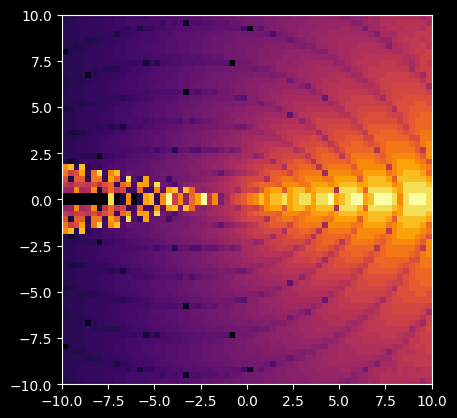

In [50]:
plt.imshow(np.log(iters_to_converge), extent=extent, cmap='inferno_r')
plt.show()

#### Animate increasing the number of iterations for a give number of terms.

In [51]:
num_terms, num_iters = 21, 60
tol, res = 1e-5, 1024
w = 10
extent = [-w, w, -w, w]  # x_start, x_end, y_start, y_end

Run either one of the two cells below:

1. Each iteration corresponds to one grid and one frame in the animation.

In [52]:
# from modules.visualize import animate_convergence_2d_roots_iters

# anim = animate_convergence_2d_roots_iters(extent, num_iters=num_iters, num_terms=num_terms, res=res)
# anim.save('anims/newton_iter.mp4', fps=1)

2. Interpolates between integers and creates grids in between.

In [53]:
# from modules.complex_grid_save import save_convergence_2d_roots_iters
# from modules.visualize import animate_convergence_2d_roots_iters_interp

# save_path = os.path.join('results')
# # # save_convergence_2d_roots_iters(save_path, extent, num_terms=num_terms, num_iters=num_iters, tol=tol, res=res)
# anim = animate_convergence_2d_roots_iters_interp(results_path=save_path, extent=extent, num_terms=num_terms, num_iters_total=num_iters)
# anim.save('anims/newton_iters.mp4', fps=20)

#### Animate increasing the number of terms for a given number of iterations.

In [54]:
from modules.complex_grid_save import save_convergence_2d_roots_terms_iters
from modules.visualize import animate_convergence_2d_roots_terms

save_path = os.path.join('results')
save_convergence_2d_roots_terms_iters(save_path, extent, num_terms=num_terms, num_iters=num_iters, tol=tol, res=res)

  0%|          | 0/21 [00:00<?, ?it/s]

In [55]:
from modules.utils import get_rounded_unique_roots, make_fractal_from_roots_img

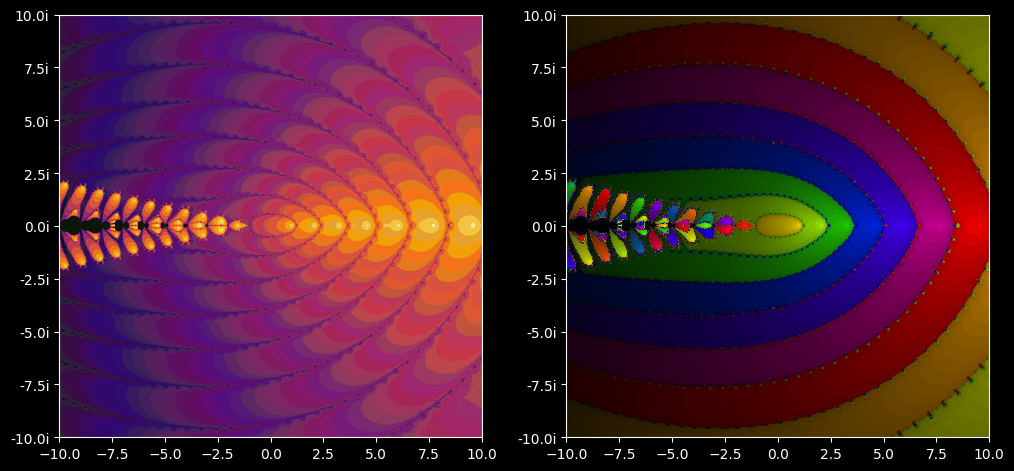

In [59]:
num_terms = 21
img_path = f'results/{num_terms}_terms/60_iters'
converged_roots = np.load(os.path.join(img_path, 'roots.npy'))
iters_to_converge = np.load(os.path.join(img_path, 'iters.npy'))

empirical_roots = get_rounded_unique_roots(converged_roots, iters_to_converge, root_prec=4)
fractal = make_fractal_from_roots_img(empirical_roots, converged_roots, tol=1e-4)

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(np.log(iters_to_converge), cmap='inferno_r', extent=extent)
ax[0].imshow(np.log(iters_to_converge), cmap='prism', extent=extent, alpha=0.1)
make_yticks_imaginary(ax[0])

# alpha = 1.0 * fractal.astype(bool)  # All alpha to 1.

# Alpha dependant on number of iterations.
normalize_01 = lambda x: (x-x.min()) / (x.max()-x.min())
# alpha = 1 - normalize_01(iters_to_converge)
alpha = 1 - normalize_01(np.log(iters_to_converge))

plt.imshow(fractal, cmap='prism', alpha=alpha, extent=extent)
make_yticks_imaginary(ax[1])

plt.show()

In [30]:
anim = animate_convergence_2d_roots_terms(results_path=save_path, extent=extent,
                                          num_iters=num_iters, num_terms_total=num_terms,
                                          all_roots=all_roots)
anim.save('anims/newton_terms.mp4', fps=1)

  0%|          | 0/21 [00:00<?, ?it/s]